<div style="margin-bottom: 32px;">
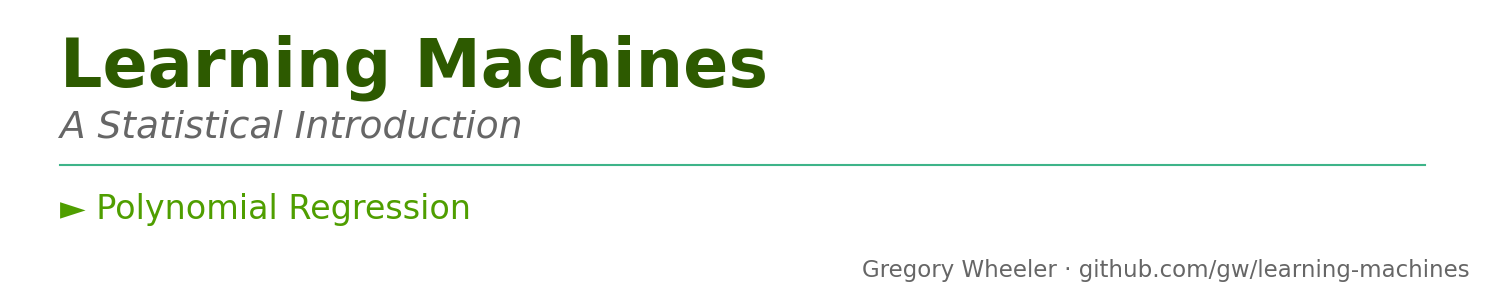
</div>


## Polynomial Regression: The Underfitting-Overfitting Tradeoff

This notebook explores the central tension in machine learning: models that are too simple fail to capture patterns in the data (underfitting), while models that are too complex memorize noise (overfitting). We use polynomial regression to make this tradeoff visceral.

**What computation adds**: Static figures show one polynomial; here we explore the entire family. Watch a high-degree polynomial pass perfectly through training points while predicting absurd values elsewhere.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys

# Add notebook directory to path for imports
sys.path.insert(0, str(Path.cwd()))

# Import and apply our theme
import mlone_theme as mt
plt.style.use('mlone_style.mplstyle')
mt.set_notebook_mode()  # Green-primary palette for notebooks

## 1. The Data: Housing Prices

We generate data that mimics the Frankfurt housing example from the text: house prices as a function of living area. The true relationship has some curvature, but the data are noisy.

In [2]:
# Set seed for reproducibility
np.random.seed(42)

# Generate training data
n_train = 15
x_train = np.sort(np.random.uniform(50, 200, n_train))  # Living area in m^2

# True relationship: price increases with area, with slight diminishing returns
def true_function(x):
    """True underlying relationship (unknown to the learner)."""
    return 100 + 2.5 * x - 0.005 * x**2

# Observed prices = true function + noise
noise_std = 25
y_train = true_function(x_train) + np.random.normal(0, noise_std, n_train)

# Generate test data (same distribution, different samples)
n_test = 50
x_test = np.sort(np.random.uniform(50, 200, n_test))
y_test = true_function(x_test) + np.random.normal(0, noise_std, n_test)

print(f"Training set: {n_train} observations")
print(f"Test set: {n_test} observations")

Training set: 15 observations
Test set: 50 observations


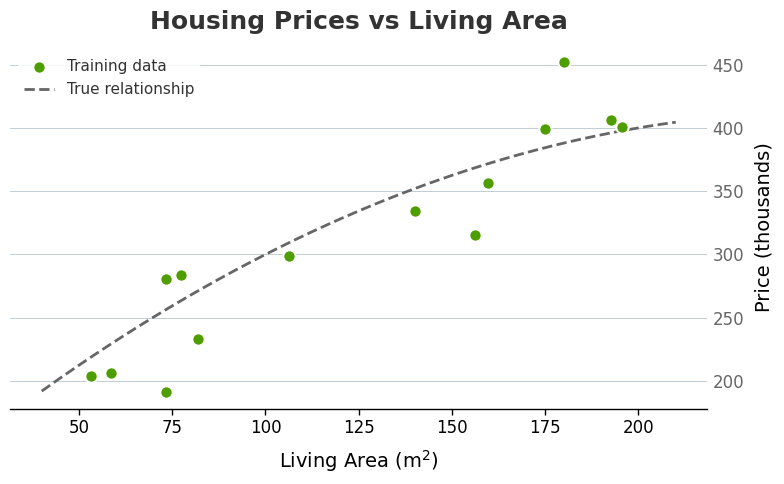

In [3]:
# Visualize the data
fig, ax = plt.subplots(figsize=(8, 5))

# Plot data points
ax.scatter(x_train, y_train, color=mt.GREEN, s=80, edgecolor='white', 
           linewidth=1.5, label='Training data', zorder=3)

# Plot true function
x_dense = np.linspace(40, 210, 200)
ax.plot(x_dense, true_function(x_dense), color=mt.GRAY, linewidth=2, 
        linestyle='--', label='True relationship', zorder=2)

ax.set_xlabel('Living Area (m$^2$)')
ax.set_ylabel('Price (thousands)')
ax.set_title('Housing Prices vs Living Area')
ax.legend(loc='upper left', frameon=True, facecolor='white', edgecolor='none')

mt.apply_economist_style(ax)
plt.tight_layout()
plt.show()

## 2. Fitting Polynomials

We fit polynomials of increasing degree to the training data. A polynomial of degree $d$ has the form:

$$\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_d x^d$$

The coefficients $\beta_0, \ldots, \beta_d$ are chosen to minimize the sum of squared residuals on the training data.

In [4]:
def fit_polynomial(x, y, degree):
    """
    Fit a polynomial of given degree using least squares.
    
    Uses numpy's polyfit for numerical stability with high-degree polynomials.
    Returns coefficients in descending order [beta_d, ..., beta_1, beta_0].
    """
    # np.polyfit is numerically stable (uses QR decomposition internally)
    coeffs = np.polyfit(x, y, degree)
    return coeffs

def predict_polynomial(x, coeffs):
    """Evaluate polynomial at given x values."""
    return np.polyval(coeffs, x)

def mse(y_true, y_pred):
    """Mean squared error."""
    return np.mean((y_true - y_pred)**2)

## 3. Underfitting: Too Simple

A degree-1 polynomial (straight line) cannot capture the curvature in the data. It *underfits*: the model is too rigid to represent the true relationship.

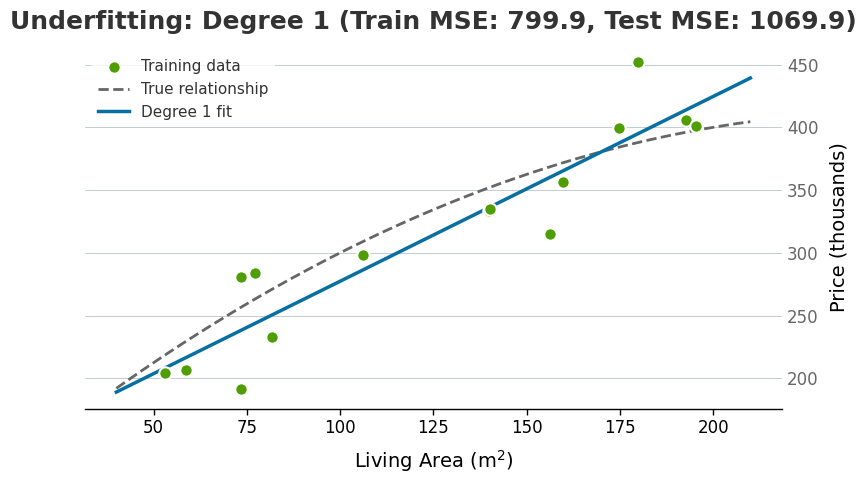

In [5]:
# Fit degree 1 (linear)
coeffs_1 = fit_polynomial(x_train, y_train, degree=1)

fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(x_train, y_train, color=mt.GREEN, s=80, edgecolor='white', 
           linewidth=1.5, label='Training data', zorder=3)
ax.plot(x_dense, true_function(x_dense), color=mt.GRAY, linewidth=2, 
        linestyle='--', label='True relationship', zorder=2)
ax.plot(x_dense, predict_polynomial(x_dense, coeffs_1), color=mt.BLUE, 
        linewidth=2.5, label='Degree 1 fit', zorder=2)

train_mse = mse(y_train, predict_polynomial(x_train, coeffs_1))
test_mse = mse(y_test, predict_polynomial(x_test, coeffs_1))

ax.set_xlabel('Living Area (m$^2$)')
ax.set_ylabel('Price (thousands)')
ax.set_title(f'Underfitting: Degree 1 (Train MSE: {train_mse:.1f}, Test MSE: {test_mse:.1f})')
ax.legend(loc='upper left', frameon=True, facecolor='white', edgecolor='none')

mt.apply_economist_style(ax)
plt.tight_layout()
plt.show()

## 4. Good Fit: Appropriate Complexity

A degree-2 polynomial can capture the curvature. It fits the training data reasonably and generalizes well to new data.

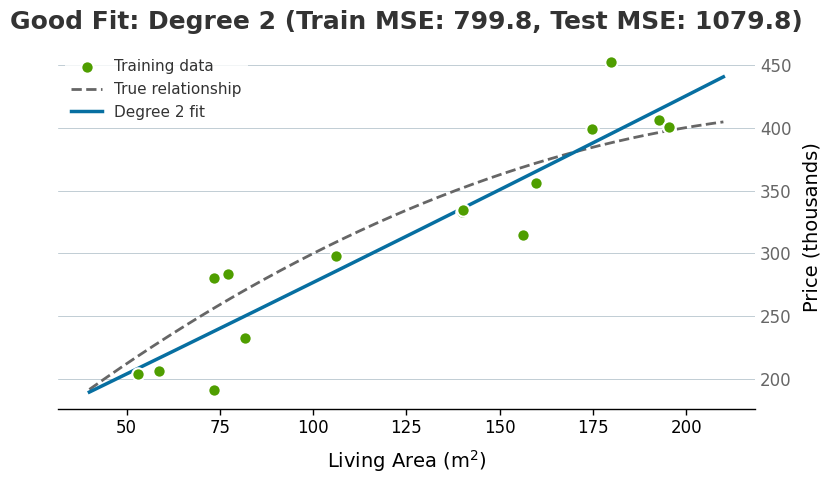

In [6]:
# Fit degree 2 (quadratic)
coeffs_2 = fit_polynomial(x_train, y_train, degree=2)

fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(x_train, y_train, color=mt.GREEN, s=80, edgecolor='white', 
           linewidth=1.5, label='Training data', zorder=3)
ax.plot(x_dense, true_function(x_dense), color=mt.GRAY, linewidth=2, 
        linestyle='--', label='True relationship', zorder=2)
ax.plot(x_dense, predict_polynomial(x_dense, coeffs_2), color=mt.BLUE, 
        linewidth=2.5, label='Degree 2 fit', zorder=2)

train_mse = mse(y_train, predict_polynomial(x_train, coeffs_2))
test_mse = mse(y_test, predict_polynomial(x_test, coeffs_2))

ax.set_xlabel('Living Area (m$^2$)')
ax.set_ylabel('Price (thousands)')
ax.set_title(f'Good Fit: Degree 2 (Train MSE: {train_mse:.1f}, Test MSE: {test_mse:.1f})')
ax.legend(loc='upper left', frameon=True, facecolor='white', edgecolor='none')

mt.apply_economist_style(ax)
plt.tight_layout()
plt.show()

## 5. Overfitting: Too Complex

A high-degree polynomial can pass exactly through every training point (when degree $\geq n-1$). But it oscillates wildly between points, capturing noise rather than signal. This is *overfitting*.

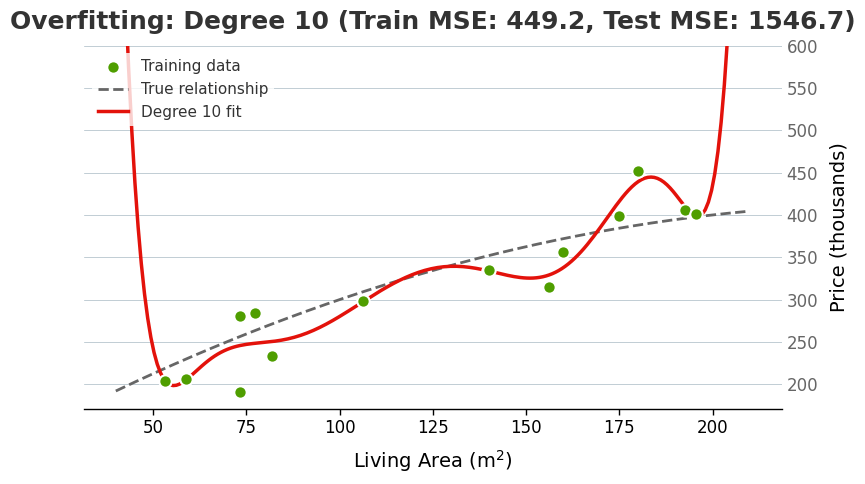

In [7]:
# Fit high-degree polynomial
high_degree = 10
coeffs_high = fit_polynomial(x_train, y_train, degree=high_degree)

fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(x_train, y_train, color=mt.GREEN, s=80, edgecolor='white', 
           linewidth=1.5, label='Training data', zorder=3)
ax.plot(x_dense, true_function(x_dense), color=mt.GRAY, linewidth=2, 
        linestyle='--', label='True relationship', zorder=2)
ax.plot(x_dense, predict_polynomial(x_dense, coeffs_high), color=mt.RED, 
        linewidth=2.5, label=f'Degree {high_degree} fit', zorder=2)

train_mse = mse(y_train, predict_polynomial(x_train, coeffs_high))
test_mse = mse(y_test, predict_polynomial(x_test, coeffs_high))

ax.set_xlabel('Living Area (m$^2$)')
ax.set_ylabel('Price (thousands)')
ax.set_title(f'Overfitting: Degree {high_degree} (Train MSE: {train_mse:.1f}, Test MSE: {test_mse:.1f})')
ax.legend(loc='upper left', frameon=True, facecolor='white', edgecolor='none')

# Set reasonable y-limits to see the oscillation
y_pred_dense = predict_polynomial(x_dense, coeffs_high)
y_min = min(y_train.min(), y_pred_dense.min()) - 20
y_max = max(y_train.max(), y_pred_dense.max()) + 20
ax.set_ylim(max(y_min, -100), min(y_max, 600))

mt.apply_economist_style(ax)
plt.tight_layout()
plt.show()

## 6. The Pathology: Negative Prices

With very high degree, the polynomial can predict *negative prices* for some house sizes. This is absurd: a model that fits training data perfectly but predicts impossible values is useless.

/var/folders/hw/kh6fv52d59xcdl6hqdh5g90m0000gn/T/ipykernel_70554/1271919426.py:9: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)


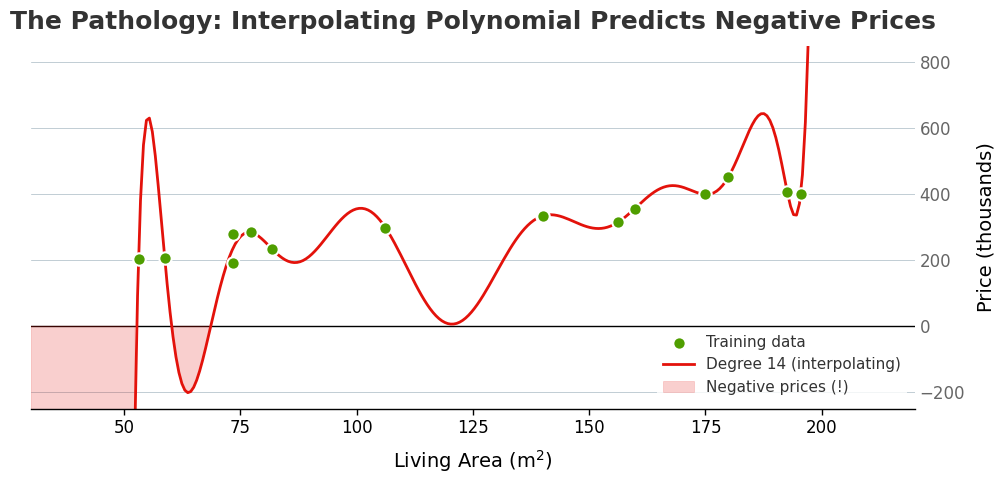

Negative prices predicted for 49 of 300 evaluation points.


In [16]:
# Fit maximum-degree polynomial (interpolating)
max_degree = n_train - 1
coeffs_max = fit_polynomial(x_train, y_train, degree=max_degree)

# Evaluate on extended range to show extrapolation disaster
x_extended = np.linspace(30, 220, 300)
y_pred_extended = predict_polynomial(x_extended, coeffs_max)

fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(x_train, y_train, color=mt.GREEN, s=80, edgecolor='white', 
           linewidth=1.5, label='Training data', zorder=4)
ax.plot(x_extended, y_pred_extended, color=mt.RED, linewidth=2, 
        label=f'Degree {max_degree} (interpolating)', zorder=2)
ax.axhline(y=0, color='black', linewidth=1, linestyle='-', zorder=1)

# Shade negative region
ax.fill_between(x_extended, y_pred_extended, 0, 
                where=(y_pred_extended < 0), 
                color=mt.RED, alpha=0.2, label='Negative prices (!)')

ax.set_xlabel('Living Area (m$^2$)')
ax.set_ylabel('Price (thousands)')
ax.set_title('The Pathology: Interpolating Polynomial Predicts Negative Prices')
ax.legend(loc='lower right', frameon=True, facecolor='white', edgecolor='none')

# Clip y-axis to see the behavior
ax.set_ylim(-250, 850)
ax.set_xlim(30, 220)

mt.apply_economist_style(ax)
plt.tight_layout()
plt.show()

# Report
negative_mask = y_pred_extended < 0
if negative_mask.any():
    print(f"Negative prices predicted for {negative_mask.sum()} of {len(x_extended)} evaluation points.")

## 7. Comparing All Degrees

Let's visualize polynomials of degrees 1, 2, 5, and 10 side by side to see the progression from underfitting to overfitting.

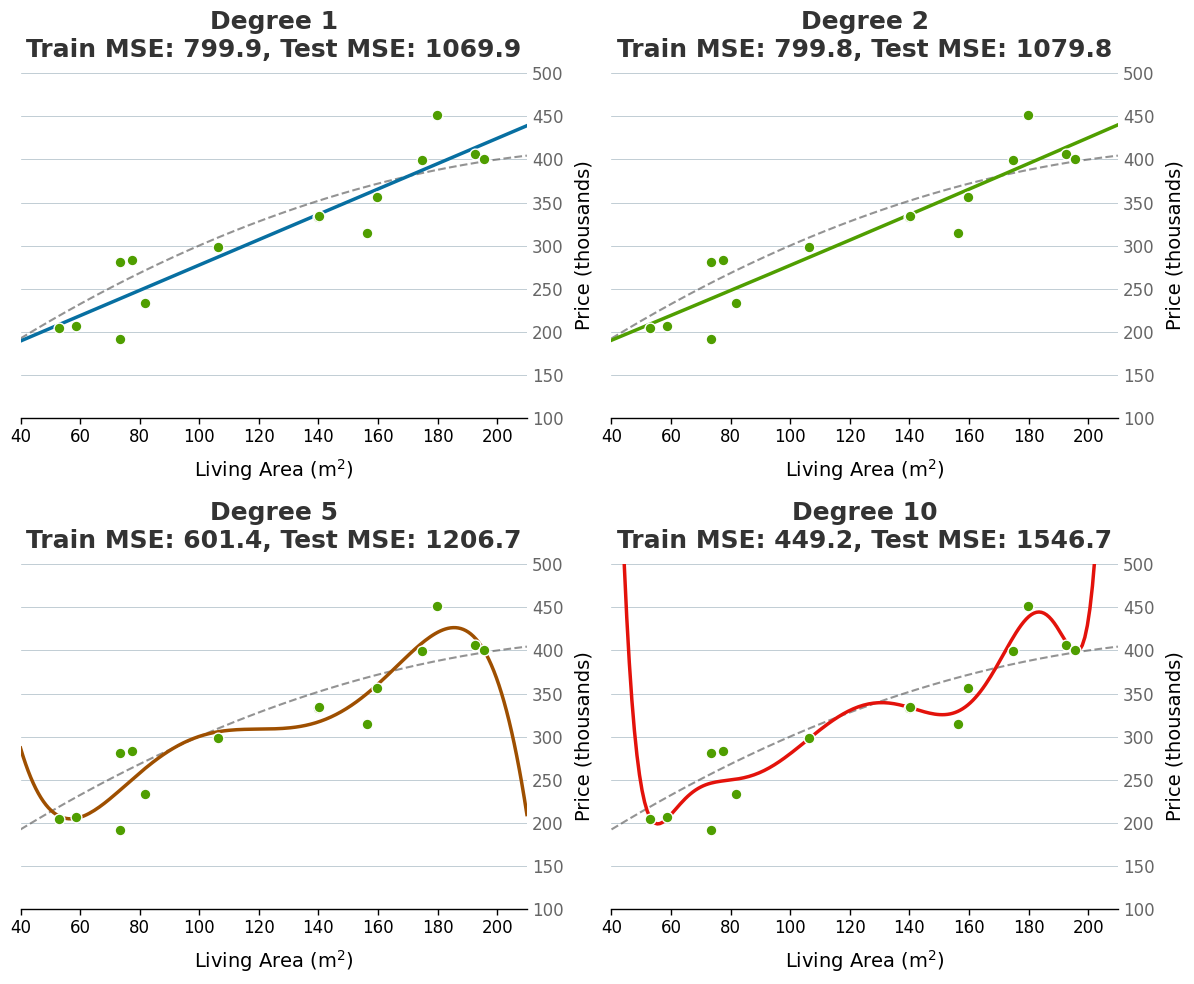

In [17]:
degrees = [1, 2, 5, 10]
colors = [mt.BLUE, mt.GREEN, mt.ORANGE, mt.RED]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, degree, color in zip(axes, degrees, colors):
    coeffs = fit_polynomial(x_train, y_train, degree)
    y_pred_dense = predict_polynomial(x_dense, coeffs)
    
    train_err = mse(y_train, predict_polynomial(x_train, coeffs))
    test_err = mse(y_test, predict_polynomial(x_test, coeffs))
    
    ax.scatter(x_train, y_train, color=mt.GREEN, s=60, edgecolor='white', 
               linewidth=1, zorder=3)
    ax.plot(x_dense, true_function(x_dense), color=mt.GRAY, linewidth=1.5, 
            linestyle='--', alpha=0.7, zorder=2)
    ax.plot(x_dense, y_pred_dense, color=color, linewidth=2.5, zorder=2)
    
    ax.set_xlabel('Living Area (m$^2$)')
    ax.set_ylabel('Price (thousands)')
    ax.set_title(f'Degree {degree}\nTrain MSE: {train_err:.1f}, Test MSE: {test_err:.1f}')
    
    # Consistent y-limits across panels
    ax.set_ylim(100, 500)
    ax.set_xlim(40, 210)
    
    mt.apply_economist_style(ax)

plt.tight_layout()
plt.show()

## 8. Training vs Test Error

The key diagnostic: training error always decreases with model complexity, but test error eventually increases. The gap between them reveals overfitting.

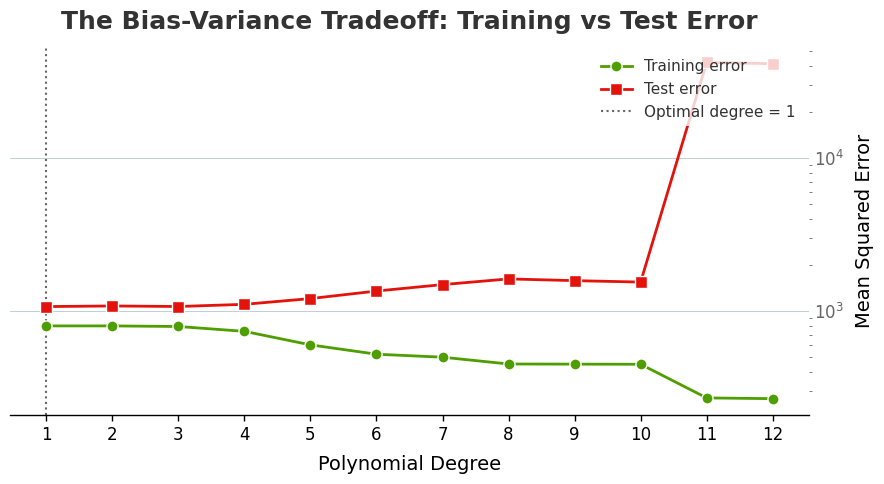

In [18]:
max_degree_to_test = 12
degrees_range = range(1, max_degree_to_test + 1)

train_errors = []
test_errors = []

for d in degrees_range:
    coeffs = fit_polynomial(x_train, y_train, d)
    train_errors.append(mse(y_train, predict_polynomial(x_train, coeffs)))
    test_errors.append(mse(y_test, predict_polynomial(x_test, coeffs)))

fig, ax = plt.subplots(figsize=(9, 5))

ax.plot(list(degrees_range), train_errors, 'o-', color=mt.GREEN, linewidth=2, 
        markersize=8, label='Training error', zorder=3)
ax.plot(list(degrees_range), test_errors, 's-', color=mt.RED, linewidth=2, 
        markersize=8, label='Test error', zorder=3)

# Mark optimal degree
optimal_degree = degrees_range[np.argmin(test_errors)]
ax.axvline(x=optimal_degree, color=mt.GRAY, linestyle=':', linewidth=1.5, 
           label=f'Optimal degree = {optimal_degree}')

ax.set_xlabel('Polynomial Degree')
ax.set_ylabel('Mean Squared Error')
ax.set_title('The Bias-Variance Tradeoff: Training vs Test Error')
ax.legend(loc='upper right', frameon=True, facecolor='white', edgecolor='none')
ax.set_xticks(list(degrees_range))

# Log scale often helps see the pattern
ax.set_yscale('log')

mt.apply_economist_style(ax)
plt.tight_layout()
plt.show()

## 9. Coefficient Explosion

Why do high-degree polynomials behave so badly? The coefficients grow enormous to create the oscillations needed to interpolate the data. This is a symptom of overfitting.

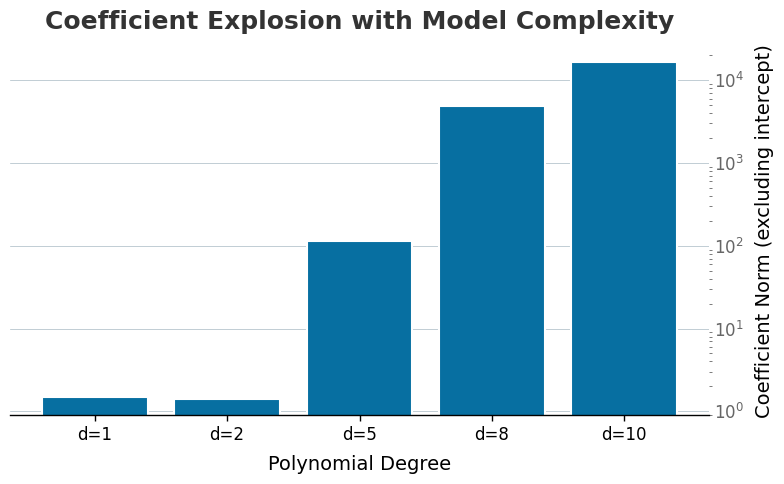

In [19]:
# Compute coefficient magnitudes for various degrees
degrees_for_coeffs = [1, 2, 5, 8, 10]
coeff_norms = []

for d in degrees_for_coeffs:
    coeffs = fit_polynomial(x_train, y_train, d)
    # Use L2 norm of all non-constant coefficients
    # polyfit returns [beta_d, ..., beta_1, beta_0], so exclude last element
    coeff_norms.append(np.linalg.norm(coeffs[:-1]))

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(range(len(degrees_for_coeffs)), coeff_norms, color=mt.BLUE, 
       edgecolor='white', linewidth=1.5)
ax.set_xticks(range(len(degrees_for_coeffs)))
ax.set_xticklabels([f'd={d}' for d in degrees_for_coeffs])
ax.set_xlabel('Polynomial Degree')
ax.set_ylabel('Coefficient Norm (excluding intercept)')
ax.set_title('Coefficient Explosion with Model Complexity')
ax.set_yscale('log')

mt.apply_economist_style(ax)
plt.tight_layout()
plt.show()

In [20]:
# Show actual coefficient values for degree 10
coeffs_10 = fit_polynomial(x_train, y_train, 10)

print("Coefficients for degree-10 polynomial:")
print("-" * 40)
# polyfit returns [beta_10, beta_9, ..., beta_1, beta_0]
for i, c in enumerate(reversed(coeffs_10)):
    print(f"  x^{i:2d} coefficient: {c:>15.6e}")

Coefficients for degree-10 polynomial:
----------------------------------------
  x^ 0 coefficient:    1.722880e+05
  x^ 1 coefficient:   -1.635187e+04
  x^ 2 coefficient:    6.835421e+02
  x^ 3 coefficient:   -1.658866e+01
  x^ 4 coefficient:    2.593829e-01
  x^ 5 coefficient:   -2.735478e-03
  x^ 6 coefficient:    1.973421e-05
  x^ 7 coefficient:   -9.625620e-08
  x^ 8 coefficient:    3.039445e-10
  x^ 9 coefficient:   -5.610996e-13
  x^10 coefficient:    4.597836e-16


## 10. Key Takeaways

1. **Underfitting** (low complexity): High bias, low variance. The model is too simple to capture the true pattern. Both training and test error are high.

2. **Overfitting** (high complexity): Low bias, high variance. The model memorizes training noise. Training error is low, but test error is high.

3. **The sweet spot**: Moderate complexity that balances bias and variance. Test error is minimized.

4. **Coefficient explosion** is a symptom of overfitting. Large coefficients create wild oscillations.

5. **Training error alone is misleading**. It always decreases with complexity. We need held-out test data (or cross-validation) to detect overfitting.

The next notebook explores **regularization**: adding a penalty on coefficient magnitude to prevent the explosion we observed here.

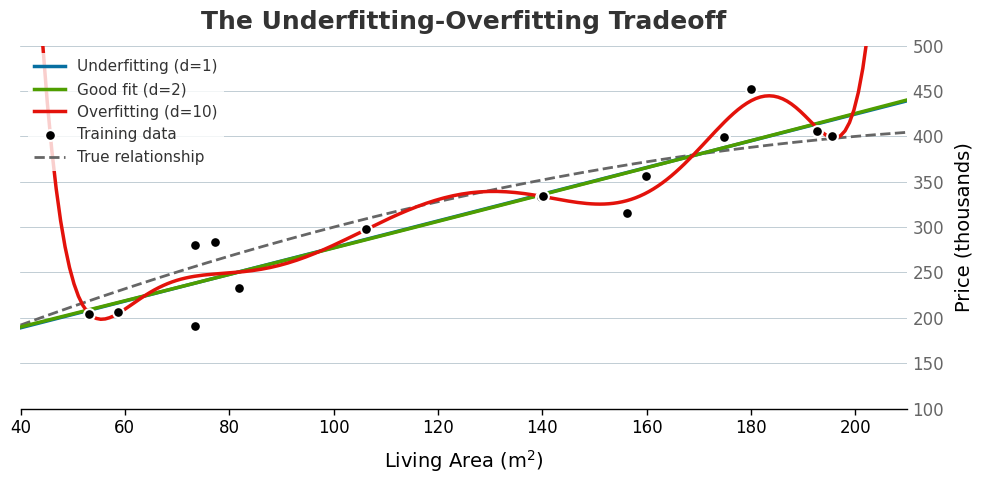

In [21]:
# Summary figure for the takeaways
fig, ax = plt.subplots(figsize=(10, 5))

# Fit three representative polynomials
for degree, color, label in [(1, mt.BLUE, 'Underfitting (d=1)'), 
                              (2, mt.GREEN, 'Good fit (d=2)'),
                              (10, mt.RED, 'Overfitting (d=10)')]:
    coeffs = fit_polynomial(x_train, y_train, degree)
    ax.plot(x_dense, predict_polynomial(x_dense, coeffs), 
            linewidth=2.5, color=color, label=label, zorder=2)

ax.scatter(x_train, y_train, color='black', s=60, edgecolor='white', 
           linewidth=1.5, label='Training data', zorder=3)
ax.plot(x_dense, true_function(x_dense), color=mt.GRAY, linewidth=2, 
        linestyle='--', label='True relationship', zorder=1)

ax.set_xlabel('Living Area (m$^2$)')
ax.set_ylabel('Price (thousands)')
ax.set_title('The Underfitting-Overfitting Tradeoff')
ax.legend(loc='upper left', frameon=True, facecolor='white', edgecolor='none')
ax.set_ylim(100, 500)
ax.set_xlim(40, 210)

mt.apply_economist_style(ax)
plt.tight_layout()
plt.show()